<a href="https://colab.research.google.com/github/HeHeHuang/CV_DeepLearning/blob/main/1_CV_NN_Image_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (7,7)

import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout,Activation, BatchNormalization 
from tensorflow.keras import utils,regularizers

## 1. DATA IMPORT

In [ ]:
nb_classes = 10
(X_train, y_train),(X_test,y_test) = mnist.load_data()


In [ ]:
print("Shape of features Training set",X_train.shape)
print("Shape of label Training set",y_train.shape)

Shape of features Training set (60000, 28, 28)
Shape of label Training set (60000,)


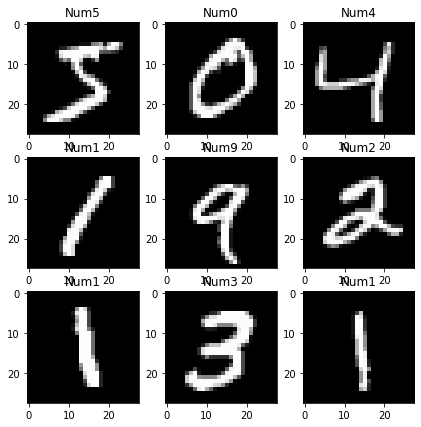

In [ ]:
# visualization for the first image
for i in range(9):
  plt.subplot(3,3,i+1) # 
  plt.imshow(X_train[i],cmap = 'gray',interpolation= 'none')
  plt.title("Num{}".format(y_train[i]))

## 2.Data Preparation
* convert 28 X 28 Pixel to 784 vector
* convert 0-255 to 0-1 (Normlization)


### Prepare X features 

In [ ]:
X_train.shape

(60000, 28, 28)

In [ ]:
X_train[1]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,  51, 159, 253, 159,  50,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,  48, 238, 252, 252, 252, 237,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  

In [ ]:
X_train = X_train.reshape(60000,784)
X_test = X_test.reshape(10000,784)

#type convert
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

#nomorlization 
X_train /=255
X_test /= 255

In [ ]:
#reshape 2d array to 1d array: vector
X_train[1]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [ ]:
x=[[2,2],
   [2,3]]
print(np.array(x))
print(np.array(x).reshape(4))
print(np.array(x).shape)
print(np.array(x).reshape(4).shape)

[[2 2]
 [2 3]]
[2 2 2 3]
(2, 2)
(4,)


### Prepare y label: one hot encoding

In [ ]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [ ]:
y_train = utils.to_categorical(y_train,nb_classes)
y_train.shape
 

(60000, 10)

In [ ]:
y_test = utils.to_categorical(y_test,nb_classes)
y_test

array([[0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

## 3. Modelling

In [ ]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(60000, 784)
(60000, 10)
(10000, 784)
(10000, 10)


In [ ]:
model = Sequential()
model.add(Dense(512, input_shape=(784,)))
model.add(Activation('relu'))
model.add(Dropout(0.2))
model.add(Dense(512,kernel_regularizer = regularizers.l2(0.001)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.2))
model.add(Dense(10))
model.add(Activation('softmax'))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 512)               401920    
                                                                 
 activation (Activation)     (None, 512)               0         
                                                                 
 dropout (Dropout)           (None, 512)               0         
                                                                 
 dense_1 (Dense)             (None, 512)               262656    
                                                                 
 batch_normalization (BatchN  (None, 512)              2048      
 ormalization)                                                   
                                                                 
 activation_1 (Activation)   (None, 512)               0         
                                                        

In [ ]:
model.compile( loss='categorical_crossentropy', optimizer='adam', metrics = ['accuracy'])

## 4. Training Model

In [ ]:
history = model.fit(X_train,y_train,
          batch_size=128, epochs=100,
          verbose=1, 
          validation_data= (X_test,y_test))

Epoch 1/100
469/469 [==============================] - 9s 18ms/step - loss: 0.5217 - accuracy: 0.9309 - val_loss: 0.2625 - val_accuracy: 0.9668
Epoch 2/100
469/469 [==============================] - 8s 17ms/step - loss: 0.2162 - accuracy: 0.9658 - val_loss: 0.1657 - val_accuracy: 0.9723
Epoch 3/100
469/469 [==============================] - 9s 18ms/step - loss: 0.1555 - accuracy: 0.9723 - val_loss: 0.1493 - val_accuracy: 0.9717
Epoch 4/100
469/469 [==============================] - 9s 18ms/step - loss: 0.1325 - accuracy: 0.9762 - val_loss: 0.1337 - val_accuracy: 0.9763
Epoch 5/100
469/469 [==============================] - 8s 17ms/step - loss: 0.1189 - accuracy: 0.9794 - val_loss: 0.1337 - val_accuracy: 0.9758
Epoch 6/100
469/469 [==============================] - 8s 17ms/step - loss: 0.1127 - accuracy: 0.9811 - val_loss: 0.1275 - val_accuracy: 0.9767
Epoch 7/100
469/469 [==============================] - 11s 23ms/step - loss: 0.1102 - accuracy: 0.9826 - val_loss: 0.1310 - val_accuracy

In [ ]:
history.params

{'verbose': 1, 'epochs': 100, 'steps': 469}

In [ ]:
history.history

{'loss': [0.5217394232749939,
  0.2162095010280609,
  0.1554950624704361,
  0.13250628113746643,
  0.1188737154006958,
  0.11266366392374039,
  0.11020161956548691,
  0.10366760194301605,
  0.09885232895612717,
  0.09461409598588943,
  0.09367647022008896,
  0.08740268647670746,
  0.08822134137153625,
  0.08491744846105576,
  0.081846222281456,
  0.081151083111763,
  0.07929401844739914,
  0.07976175099611282,
  0.07401113212108612,
  0.07467968016862869,
  0.07395285367965698,
  0.07053003460168839,
  0.06961014866828918,
  0.0662689283490181,
  0.06741223484277725,
  0.06453926861286163,
  0.0599372461438179,
  0.06287897378206253,
  0.060028813779354095,
  0.061509184539318085,
  0.06062058359384537,
  0.05644349381327629,
  0.055793069303035736,
  0.05601527541875839,
  0.05176519602537155,
  0.05492524802684784,
  0.05312511697411537,
  0.047607481479644775,
  0.052162718027830124,
  0.05104523152112961,
  0.052023641765117645,
  0.04854774475097656,
  0.04796140640974045,
  0.048

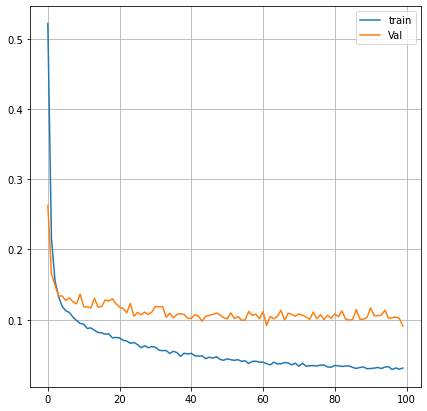

In [ ]:
plt.figure()
plt.plot(history.history['loss'],label='train')
plt.plot(history.history['val_loss'],label='Val')
plt.legend()
plt.grid()

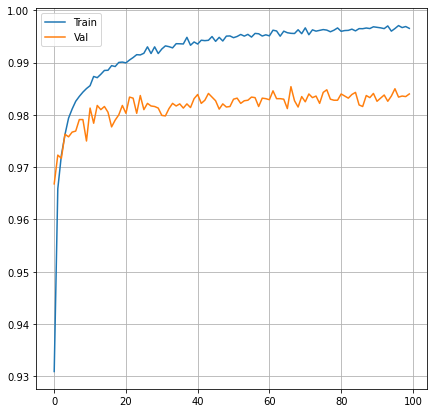

In [ ]:
plt.figure()
plt.plot(history.history['accuracy'],label='Train')
plt.plot(history.history['val_accuracy'],label='Val')
plt.legend()
plt.grid()

## 5. Evaluating Model

In [ ]:
score = model.evaluate(X_test,y_test,verbose=1)
print('Test accuracy:',score)

313/313 [==============================] - 1s 4ms/step - loss: 0.0908 - accuracy: 0.9840
Test accuracy: [0.09082210063934326, 0.984000027179718]


## 6. Model Saving

In [ ]:
model.save('mo_model.h5')
model.tf.keras.models.load_model('my_model.h5')

AttributeError: ignored

###Tensorflowboard